In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

In [2]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras import Sequential

In [3]:
start = dt.datetime(2018,1,1)
end = dt.datetime.now()
crypto_currency = 'BTC'
against_currency = 'USD'
local_currency= 'SAR=X'
# SAR DATA
data_local_currency = web.DataReader(local_currency, 'yahoo', start, end) 
data_local_currency = data_local_currency[['Close']]
data_local_currency = data_local_currency.rename(columns = {'Close': 'Close_SAR'})
#Bitcoin Data
data = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end) 
data = data[['Close']]
data = data.rename(columns = {'Close': 'Close_BTC'})
#NVDA Data
df_NVDA=  web.DataReader('NVDA', 'yahoo', start, end) 
df_NVDA = df_NVDA[['Close']]
df_NVDA = df_NVDA.rename(columns = {'Close': 'Close_NVDA'})

#Merge Table
data = data.merge(data_local_currency, on = 'Date')
data = data.merge(df_NVDA, on = 'Date')
data
test_data=data
test_data

,Close_BTC,Close_SAR,Close_NVDA
Date,,,
2018-01-02,14982.099609,3.740800,49.837502
2018-01-03,15201.000000,3.745700,53.117500
2018-01-04,15599.200195,3.746100,53.397499
2018-01-05,17429.500000,3.746200,53.849998
2018-01-08,15170.099609,3.750000,55.500000
...,...,...,...
2021-11-17,60368.011719,3.747404,292.609985
2021-11-18,56942.136719,3.746294,316.750000
2021-11-19,58119.578125,3.746619,329.850006


In [4]:
# df1 = web.DataReader('BTC', 'yahoo', start, end)
# df1 = df1[['Close']]
# df2 = web.DataReader('USD', 'yahoo', start, end)
# df2 = df2[['Close']]
# df = df1.merge(df2, on = 'Date')
# df
# df1 = pdr.get_data_yahoo('BTC', '2020-01-01', '2021-10-31')
# df1 = df1[['Close']]
# df2 = pdr.get_data_yahoo('USD', '2020-01-01', '2021-10-31')
# df2 = df2[['Close']]
# df = df1.merge(df2, on = 'Date')
# df

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
#x=data[['Close_x','Close_y']]
#data_local_currency= data_local_currency['Close']
#x = x.merge(data_local_currency, on = 'Date') 
scaled_data = scaler.fit_transform(data.values.reshape(-1,1))  


In [6]:
prediction_days = 60
future_day = 30

In [7]:
x_train, y_train = [], []

In [8]:
#for x in range(prediction_days, len(scaled_data)):
#    x_train.append(scaled_data[x-prediction_days:x, 0])
#    y_train.append(scaled_data[x, 0])

# predicting the 30th day after 60 days
for x in range(prediction_days, len(scaled_data)-future_day):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x+future_day, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
#create Neural Network 
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
78/78 [==============================] - 20s 142ms/step - loss: 0.0319
Epoch 2/25
78/78 [==============================] - 12s 151ms/step - loss: 0.0315
Epoch 3/25
78/78 [==============================] - 11s 142ms/step - loss: 0.0320
Epoch 4/25
78/78 [==============================] - 13s 162ms/step - loss: 0.0311
Epoch 5/25
78/78 [==============================] - 11s 146ms/step - loss: 0.0311
Epoch 6/25
78/78 [==============================] - 11s 143ms/step - loss: 0.0311
Epoch 7/25
78/78 [==============================] - 11s 140ms/step - loss: 0.0313
Epoch 8/25
78/78 [==============================] - 10s 132ms/step - loss: 0.0311
Epoch 9/25
78/78 [==============================] - 11s 141ms/step - loss: 0.0309
Epoch 10/25
78/78 [==============================] - 10s 133ms/step - loss: 0.0311
Epoch 11/25
43/78 [===============>..............] - ETA: 5s - loss: 0.0316

In [ ]:
test_data['Close_NVDA']

<function matplotlib.pyplot.show(close=None, block=None)>

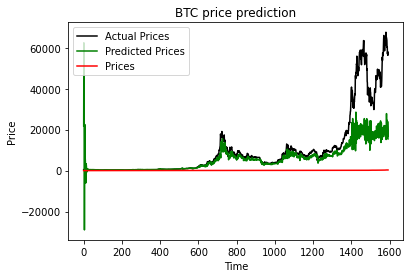

In [34]:
test_start = dt.datetime(2018,1,1)
test_end = dt.datetime.now()
#test_data = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', test_start, test_end)
#test_data= Above defin
actual_prices = test_data['Close_BTC'].values
total_dataset = pd.concat((data['Close_BTC'], test_data['Close_BTC']), axis=0)
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.fit_transform(model_inputs)
x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

plt.plot(actual_prices, color='black', label='Actual Prices')
plt.plot(prediction_prices, color='green', label='Predicted Prices')
plt.plot(test_data['Close_NVDA'].values, color='red', label='Prices')

plt.title(f'{crypto_currency} price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show

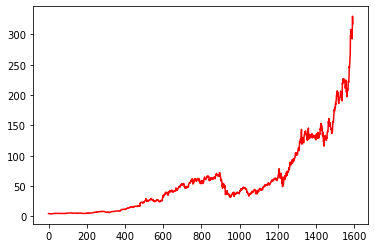

In [35]:
plt.plot(test_data['Close_NVDA'].values, color='red', label='Prices')

In [ ]:
# Predict next day
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs) + 1, 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print()
